# Soal 15

1. [Buat simple linear regression untuk tiap predictor](#1)
2. [Buat model multiple regression](#2)
3. [Bandingkan model nomor 1 dan nomor 2. Buat Plotnya](#3)
4. [Apakah ada bukti bahwa ada hubungan tidak linear antara predictor dan response](#4)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.datasets import load_boston

%matplotlib inline

## 1

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = pd.Series(boston.target)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [4]:
list(df)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [5]:
predictors = [c for c in list(df) if c not in ["CRIM"]]

In [6]:
predictors

['ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [8]:
print("{:>9} {:>22} {:>24}".format("predictor", "coef","pvalue"))
coefs = {}
for predictor in predictors:
    model = 'CRIM ~ ' + predictor
    res = smf.ols(formula=model, data=df).fit()
    print("{:>9} {:>22} {:>24}".format(predictor, res.params[predictor],res.pvalues[predictor]))
    coefs[predictor] = [res.params[predictor]] 

predictor                   coef                   pvalue
       ZN   -0.07352128504760275    6.151721643267655e-06
    INDUS     0.5068466125328721    2.444137454620807e-21
     CHAS    -1.8715451282984525      0.21434357527851233
      NOX       30.9752586128881    9.159490025915888e-23
       RM    -2.6910453263732346    5.838093667798685e-07
      AGE    0.10713083068208369   4.2590641745370265e-16
      DIS     -1.542831118235415   1.2688320361261509e-18
      RAD     0.6141366715916436   1.6206052887449367e-55
      TAX     0.0295625570653893    9.759521193159848e-47
  PTRATIO     1.1446126207906333   3.8751218902071097e-11
        B   -0.03553454597446588   1.4320876785176315e-18
    LSTAT     0.5444063736854577    7.124777983462517e-27
     MEDV    -0.3606473433413291   2.0835501108140565e-19


In [10]:
coefs

{'ZN': [-0.07352128504760275],
 'INDUS': [0.5068466125328721],
 'CHAS': [-1.8715451282984525],
 'NOX': [30.9752586128881],
 'RM': [-2.6910453263732346],
 'AGE': [0.10713083068208369],
 'DIS': [-1.542831118235415],
 'RAD': [0.6141366715916436],
 'TAX': [0.0295625570653893],
 'PTRATIO': [1.1446126207906333],
 'B': [-0.03553454597446588],
 'LSTAT': [0.5444063736854577],
 'MEDV': [-0.3606473433413291]}

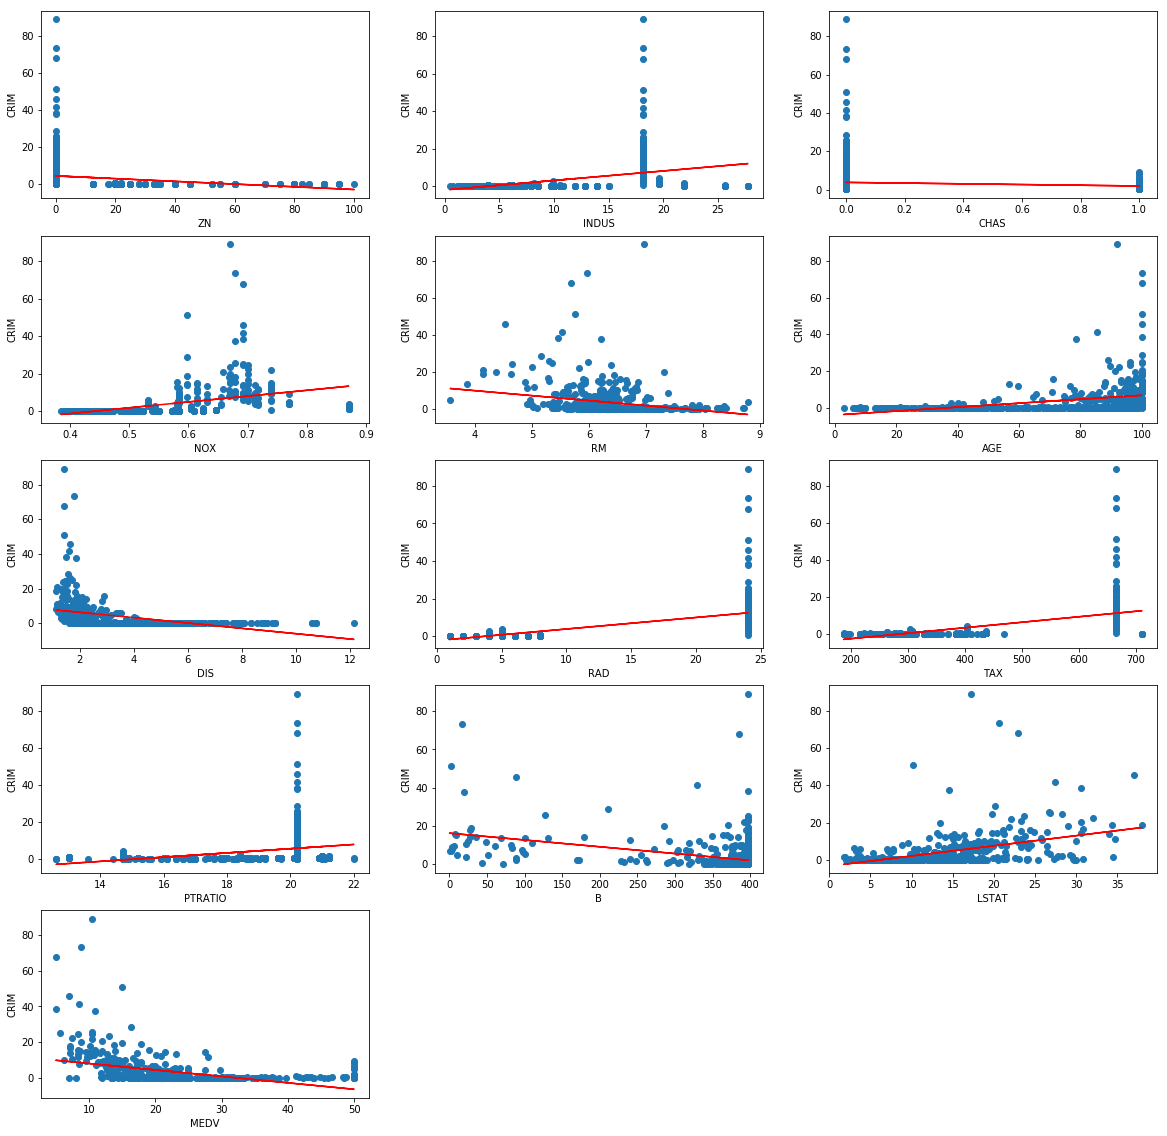

In [11]:
plt.figure(figsize=(20, 20))

for i, predictor in enumerate(predictors):
    model = 'CRIM ~ ' + predictor
    res = smf.ols(formula = model, data=df).fit()
    plt.subplot(5,3,i+1)
    plt.xlabel(predictor)
    plt.ylabel("CRIM")
    plt.scatter(df[predictor], df['CRIM'])
    plt.plot(df[predictor], res.fittedvalues, color='red')

[kembali ke atas](#Soal-15)

## 2

In [12]:
all_columns = "+".join([c for c in list(df) if c not in ["CRIM"]])
model = " CRIM ~ " + all_columns
res = smf.ols(formula = model, data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     30.73
Date:                Fri, 01 Feb 2019   Prob (F-statistic):           2.04e-55
Time:                        20:28:45   Log-Likelihood:                -1655.7
No. Observations:                 506   AIC:                             3339.
Df Residuals:                     492   BIC:                             3399.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.4184      7.270      2.396      0.0

[kembali ke atas](#Soal-15)

## 3

In [13]:
for pred in coefs:
    coefs[pred].append(res.params[pred])

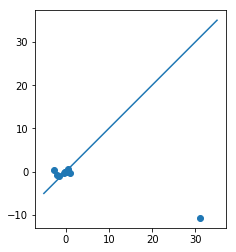

In [14]:
plt.scatter([coefs[pred][0] for pred in coefs], [coefs[pred][1] for pred in coefs])
plt.plot([-5,35],[-5,35]) # plot y=x
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

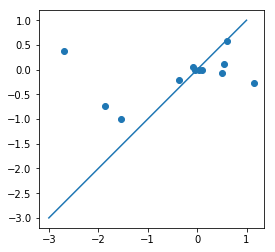

In [15]:
plt.scatter([coefs[pred][0] for pred in coefs if pred != "NOX"], [coefs[pred][1] for pred in coefs if pred != "NOX"])
plt.plot([-3,1], [-3,1]) # plot y=x
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [16]:
for pred in coefs:
    print("{:>9} {:>22} {:>24}".format(pred, coefs[pred][0], coefs[pred][1]))

       ZN   -0.07352128504760275      0.04491938833833752
    INDUS     0.5068466125328721    -0.061575959143158956
     CHAS    -1.8715451282984525      -0.7414350725371426
      NOX       30.9752586128881       -10.64549984639875
       RM    -2.6910453263732346       0.3810702287184363
      AGE    0.10713083068208369    0.0020113635247481516
      DIS     -1.542831118235415      -0.9949917539066351
      RAD     0.6141366715916436       0.5888381693758247
      TAX     0.0295625570653893   -0.0037457234762569105
  PTRATIO     1.1446126207906333     -0.27873104890083156
        B   -0.03553454597446588     -0.00685514852971416
    LSTAT     0.5444063736854577      0.12126930458422303
     MEDV    -0.3606473433413291     -0.19921780261317856


[kembali ke atas](#Soal-15)

## 4

predictor                   coef                   pvalue


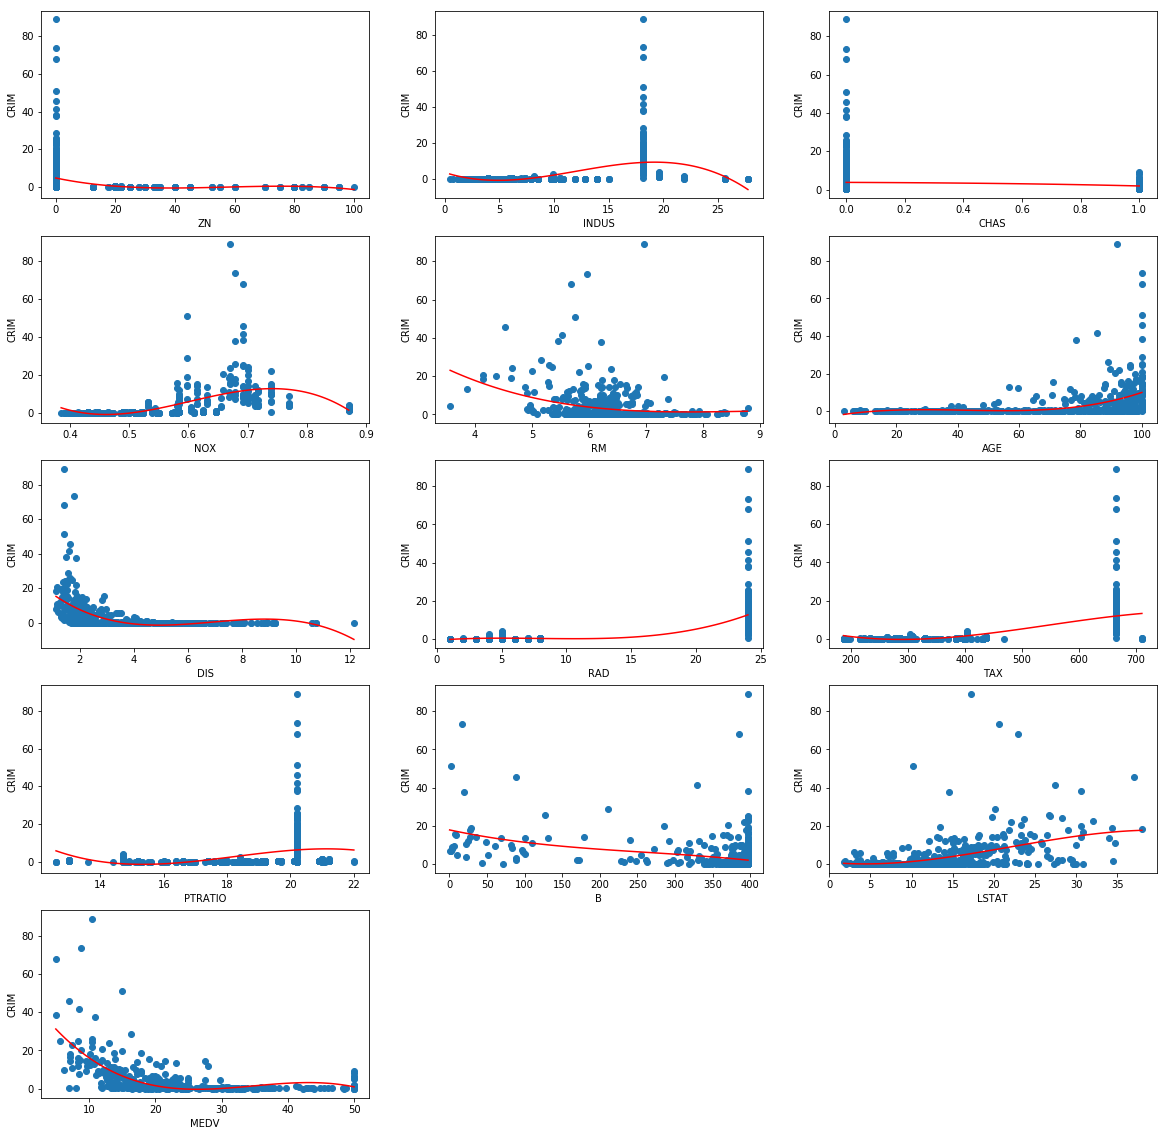

In [17]:
print("{:>9} {:>22} {:>24}".format("predictor", "coef","pvalue"))
coefs = {}

plt.figure(figsize=(20, 20))

for i, predictor in enumerate(predictors):
    model = 'CRIM ~ ' + predictor + " + np.power(" + predictor + ", 2) + np.power(" + predictor + ", 3)"
    res = smf.ols(formula = model, data=df).fit()
    plt.subplot(5,3,i+1)
    plt.xlabel(predictor)
    plt.ylabel("CRIM")
    plt.scatter(df[predictor], df['CRIM'])
    x = np.linspace(min(df[predictor]),max(df[predictor]), 100)
    y = res.params[0] + x*res.params[1]+ res.params[2]*(x**2)+ res.params[3]*(x**3)
    plt.plot(x, y, color='red')

In [18]:
print("{:>13} {:>22} {:>22} {:>22} {:>22} {:>22}".format("Pvalues for", "beta_0", "beta_1", "beta_2", "beta_3", "f_pvalue"))

for predictor in predictors:
    model = 'CRIM ~ ' + predictor + " + np.power(" + predictor + ", 2) + np.power(" + predictor + ", 3)"
    res = smf.ols(formula = model, data=df).fit()
    # http://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.html
    print("{:>13} {:>22} {:>22} {:>22} {:>22} {:>22}".format(predictor, res.pvalues[0], res.pvalues[1], res.pvalues[2], res.pvalues[3], res.f_pvalue))
    coefs[predictor] = [res.params[predictor]] 

  Pvalues for                 beta_0                 beta_1                 beta_2                 beta_3               f_pvalue
           ZN  7.007549102153049e-26   0.002759025816137138    0.09562861334020208    0.23222420001929456  1.493835486494624e-06
        INDUS    0.02127779341724847  5.996850336550802e-05  4.530067332031857e-10 1.7044411827492229e-12  3.883757105301397e-32
         CHAS 1.8392584982986124e-19     0.2143435752785134     0.2143435752785135     0.2143435752785135    0.21434357527854317
          NOX 2.5889952588127288e-11  5.832574000017562e-13  1.522887409265701e-14 1.5877781649655969e-15  1.944006533283078e-37
           RM    0.08318387284841824    0.21659351269645624     0.3727454652123774     0.5206758617415794  9.064938181874174e-08
          AGE    0.35608818782287965    0.14200846484879873    0.04742487317735903   0.006784649759092411 1.7617378955702614e-20
          DIS  2.625993995501171e-30  7.973990285059572e-18   5.55230636339025e-12 1.161292027800

[kembali ke atas](#Soal-15)